In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
! pip install factor_analyzer==0.3.2
from factor_analyzer import FactorAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 793.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40377 sha256=5f0c3f07296c8b928bd12819cb1b87e37f425730681f7e11ef15040dacec485b
  Stored in directory: /root/.cache/pip/wheels/a6/27/cc/12bbf18d720958207be6813fdaf91d89a965b1d042fc689e04
Successfully built factor_analyzer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open("/content/drive/MyDrive/Analise Multivariada/BDI.txt") as source:
    df = pd.read_csv(source, delimiter=" ")

In [ ]:
df.head()

,BDI1,BDI2,BDI3,BDI4,BDI5,BDI6,BDI7,BDI8,BDI9,BDI10,...,BDI13,BDI14,BDI15,BDI16,BDI17,BDI18,BDI19,BDI20,BDI21,GENDER
1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2
3,2.0,2.0,2.0,2.0,3.0,4.0,2.0,2.0,2.0,4.0,...,4.0,3.0,2.0,2.0,3.0,2.0,1.0,2.0,4.0,2
4,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2


In [ ]:
df.rename(columns={'BDI1': 'Tristeza','BDI2': 'Pessimismo','BDI3': 'Senso de fracasso','BDI4': 'Insatisfação','BDI5': 'Sentimento de culpa','BDI6': 'Expectativa de punição','BDI7': 'Desgosto de si mesmo','BDI8': 'Auto-acusação','BDI9': 'Vontade de se suicidar','BDI10': 'Crises de choro','BDI11': 'Irritabilidade','BDI12': 'Reclusão social','BDI13': 'Indecisão','BDI14': 'Mudanças no corpo','BDI15': 'Lentidão','BDI16': 'Insônia','BDI17': 'Facilidade em cansar','BDI18': 'Perda de apetite','BDI19': 'Perda de peso','BDI20': 'Preocupação','BDI21': 'Pouca energia'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 1 to 389
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tristeza                389 non-null    float64
 1   Pessimismo              389 non-null    float64
 2   Senso de fracasso       389 non-null    float64
 3   Insatisfação            389 non-null    float64
 4   Sentimento de culpa     389 non-null    float64
 5   Expectativa de punição  389 non-null    float64
 6   Desgosto de si mesmo    389 non-null    float64
 7   Auto-acusação           389 non-null    float64
 8   Vontade de se suicidar  389 non-null    float64
 9   Crises de choro         389 non-null    float64
 10  Irritabilidade          389 non-null    float64
 11  Reclusão social         389 non-null    float64
 12  Indecisão               389 non-null    float64
 13  Mudanças no corpo       389 non-null    float64
 14  Lentidão                389 non-null    fl

In [27]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=22, rotation='varimax')

fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([6.43073762, 1.27010268, 1.20959874, 1.06203894, 0.99106845,
       0.95094942, 0.93137347, 0.88243495, 0.80630348, 0.76835725,
       0.75189884, 0.73669465, 0.65159665, 0.61181532, 0.59160057,
       0.56594813, 0.53699626, 0.51460176, 0.48650926, 0.45257831,
       0.41505478, 0.38174048])

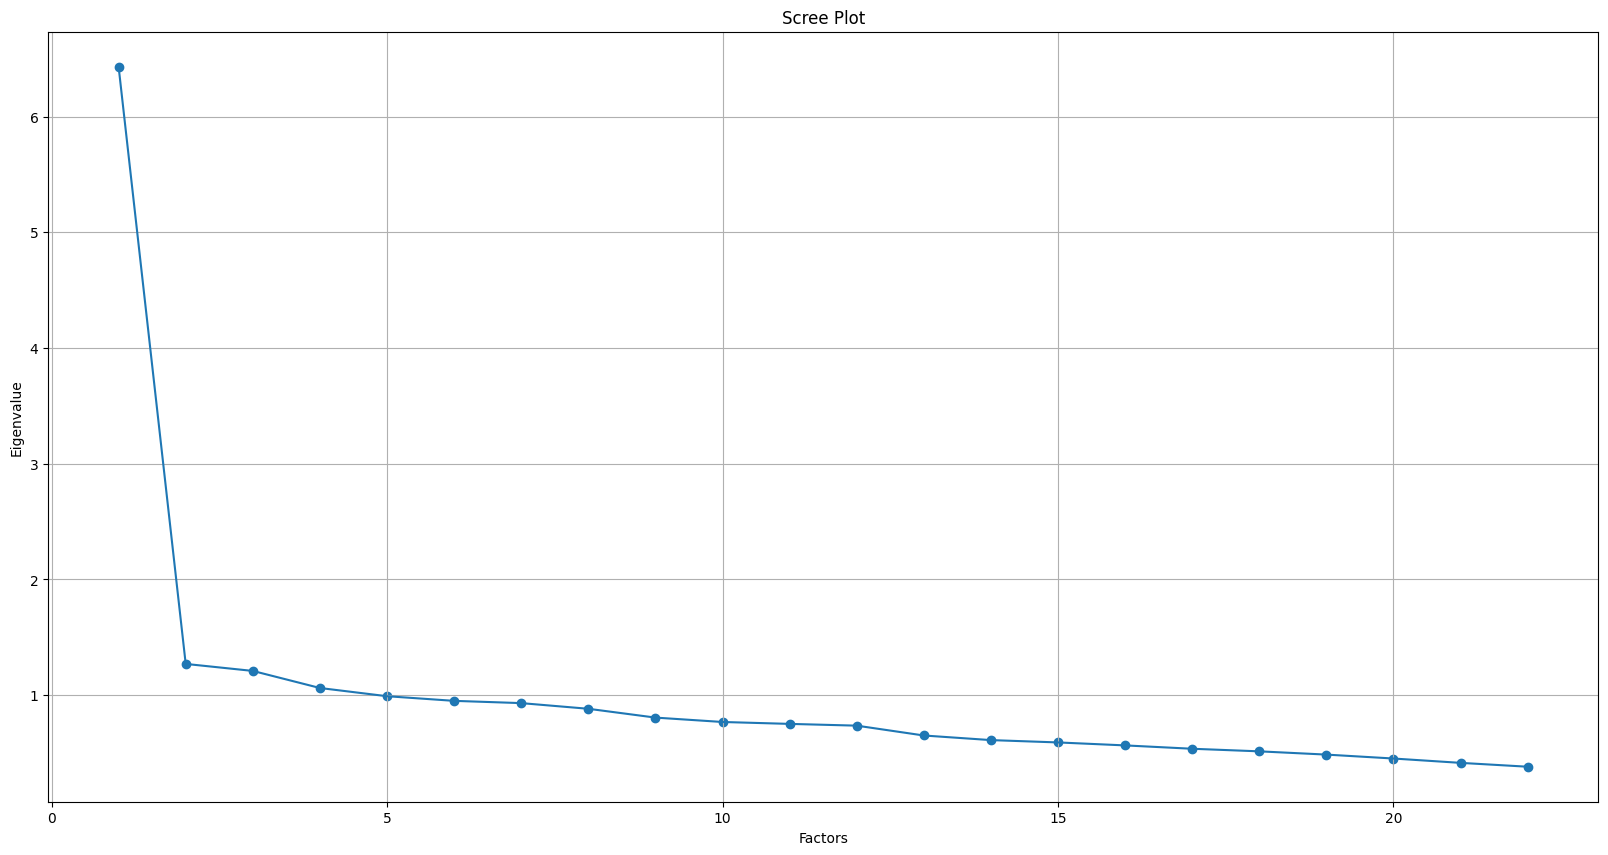

In [28]:
# Create scree plot using matplotlib

plt.figure(figsize=(20,10))
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')

plt.grid()
plt.show()

Vamos considerar 3 fatores, já que eles aparentam representar a maior parte da variabilidade dos dados

In [29]:
fa = FactorAnalyzer(n_factors=3, rotation=None)
fa.fit(df)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [30]:
L = fa.loadings_
# Arredondar os valores
np.round(L,2)

array([[ 0.62,  0.03,  0.11],
       [ 0.65,  0.21,  0.06],
       [ 0.66,  0.31, -0.05],
       [ 0.54,  0.1 , -0.16],
       [ 0.65,  0.15, -0.04],
       [ 0.52,  0.02,  0.11],
       [ 0.6 ,  0.06, -0.07],
       [ 0.49,  0.2 , -0.05],
       [ 0.54,  0.05,  0.08],
       [ 0.48,  0.  , -0.19],
       [ 0.3 , -0.11, -0.31],
       [ 0.54, -0.14, -0.14],
       [ 0.58, -0.02,  0.03],
       [ 0.48, -0.08, -0.01],
       [ 0.47, -0.01, -0.12],
       [ 0.51, -0.17,  0.24],
       [ 0.56, -0.28,  0.06],
       [ 0.43, -0.13,  0.26],
       [ 0.2 , -0.04,  0.19],
       [ 0.47, -0.03,  0.16],
       [ 0.44, -0.35, -0.14],
       [-0.16,  0.28,  0.09]])

In [37]:
L = pd.DataFrame(fa.loadings_)
np.round(L,2)
L.index = df.columns
L.columns = ['FA1','FA2','FA3']
L

,FA1,FA2,FA3
Tristeza,0.621987,0.034361,0.109147
Pessimismo,0.651471,0.208942,0.058647
Senso de fracasso,0.660450,0.310076,-0.048373
Insatisfação,0.538855,0.098789,-0.162877
Sentimento de culpa,0.648410,0.148668,-0.036330
Expectativa de punição,0.522966,0.016722,0.110525
Desgosto de si mesmo,0.603027,0.063273,-0.065185
Auto-acusação,0.494391,0.195718,-0.049465
Vontade de se suicidar,0.538776,0.048422,0.078381
Crises de choro,0.478844,0.001815,-0.189796


## Angústia

In [35]:
L.sort_values(by='FA1',ascending=False).head(10)

,FA1,FA2,FA3
Senso de fracasso,0.660450,0.310076,-0.048373
Pessimismo,0.651471,0.208942,0.058647
Sentimento de culpa,0.648410,0.148668,-0.036330
Tristeza,0.621987,0.034361,0.109147
Desgosto de si mesmo,0.603027,0.063273,-0.065185
Indecisão,0.581358,-0.020667,0.031926
Facilidade em cansar,0.560043,-0.282632,0.059349
Insatisfação,0.538855,0.098789,-0.162877
Vontade de se suicidar,0.538776,0.048422,0.078381
Reclusão social,0.538042,-0.141645,-0.141469


## Desesperança

In [38]:
L.sort_values(by='FA2',ascending=False).head(10)

,FA1,FA2,FA3
Senso de fracasso,0.660450,0.310076,-0.048373
GENDER,-0.163632,0.275778,0.088522
Pessimismo,0.651471,0.208942,0.058647
Auto-acusação,0.494391,0.195718,-0.049465
Sentimento de culpa,0.648410,0.148668,-0.036330
Insatisfação,0.538855,0.098789,-0.162877
Desgosto de si mesmo,0.603027,0.063273,-0.065185
Vontade de se suicidar,0.538776,0.048422,0.078381
Tristeza,0.621987,0.034361,0.109147
Expectativa de punição,0.522966,0.016722,0.110525


## Disturbio alimentar

In [39]:
L.sort_values(by='FA3',ascending=False).head(10)

,FA1,FA2,FA3
Perda de apetite,0.431993,-0.131395,0.259149
Insônia,0.512907,-0.165283,0.237939
Perda de peso,0.204106,-0.039485,0.190846
Preocupação,0.472500,-0.025397,0.158888
Expectativa de punição,0.522966,0.016722,0.110525
Tristeza,0.621987,0.034361,0.109147
GENDER,-0.163632,0.275778,0.088522
Vontade de se suicidar,0.538776,0.048422,0.078381
Facilidade em cansar,0.560043,-0.282632,0.059349
Pessimismo,0.651471,0.208942,0.058647


## Variância percentual explicada por cada fator


In [40]:
np.round(fa.get_factor_variance()/np.sum(fa.get_factor_variance()),2)

array([[0.72, 0.07, 0.06],
       [0.03, 0.  , 0.  ],
       [0.03, 0.04, 0.04]])

In [50]:
L.sort_values(by='FA1',ascending=False).head()

,FA1,FA2,FA3
Senso de fracasso,0.660450,0.310076,-0.048373
Pessimismo,0.651471,0.208942,0.058647
Sentimento de culpa,0.648410,0.148668,-0.036330
Tristeza,0.621987,0.034361,0.109147
Desgosto de si mesmo,0.603027,0.063273,-0.065185


In [51]:
L.sort_values(by='FA2',ascending=False).head()

,FA1,FA2,FA3
Senso de fracasso,0.660450,0.310076,-0.048373
GENDER,-0.163632,0.275778,0.088522
Pessimismo,0.651471,0.208942,0.058647
Auto-acusação,0.494391,0.195718,-0.049465
Sentimento de culpa,0.648410,0.148668,-0.036330


In [52]:
L.sort_values(by='FA3',ascending=False).head()

,FA1,FA2,FA3
Perda de apetite,0.431993,-0.131395,0.259149
Insônia,0.512907,-0.165283,0.237939
Perda de peso,0.204106,-0.039485,0.190846
Preocupação,0.472500,-0.025397,0.158888
Expectativa de punição,0.522966,0.016722,0.110525


## Conclusão

Foi possível identificar estruturas subjacentes (ou fatores latentes) no
conjuntos de dados do exercício, e assim foi possível reduzir a dimensionalidade do problema. Com base na aplicação da análise fatorial ao Inventário de Depressão de Beck (BDI), podemos concluir que essa abordagem estatística oferece um entendimento valioso para a compreensão da estrutura subjacente da depressão. Através da análise fatorial, podemos identificar dimensões latentes que estão relacionadas aos diferentes aspectos da depressão, o que pode ser fundamental em diversos contextos, como pesquisa clínica, prática terapêutica e avaliação de pacientes.